라이브러리

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

데이터셋 준비

In [3]:
Swedish_Auto_Insurance = pd.read_csv('https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt', sep='\t',skiprows=9)

In [4]:
Swedish_Auto_Insurance

,X,Y
0,108,"392,5"
1,19,"46,2"
2,13,"15,7"
3,124,"422,2"
4,40,"119,4"
...,...,...
58,9,"87,4"
59,31,"209,8"
60,14,"95,5"
61,53,"244,6"


In [5]:
new_columns = ['male', 'female']

# 알아보기 쉽게 열 이름 변
Swedish_Auto_Insurance.columns = new_columns
Swedish_Auto_Insurance

,male,female
0,108,"392,5"
1,19,"46,2"
2,13,"15,7"
3,124,"422,2"
4,40,"119,4"
...,...,...
58,9,"87,4"
59,31,"209,8"
60,14,"95,5"
61,53,"244,6"


In [6]:
# 데이터 정보 확인
Swedish_Auto_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   male    63 non-null     int64 
 1   female  63 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
# 오브젝트 값들 확인
Swedish_Auto_Insurance['female'].value_counts()

77,5     2
392,5    1
76,1     1
57,2     1
217,6    1
        ..
98,1     1
27,9     1
38,1     1
0        1
187,5    1
Name: female, Length: 62, dtype: int64

In [8]:
# 너무 많아서 원핫 인코딩 불가능
len(Swedish_Auto_Insurance['female'].value_counts())

62

In [9]:
# 데이터가 돈이라는 걸 알아서 문자열로 변
# 열의 값의 ,를 .로 바꾸기
Swedish_Auto_Insurance['female'] = Swedish_Auto_Insurance['female'].str.replace(',', '.').astype(float)

In [10]:
# 타입 실수 확인
Swedish_Auto_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    63 non-null     int64  
 1   female  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [11]:
Swedish_Auto_Insurance

,male,female
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


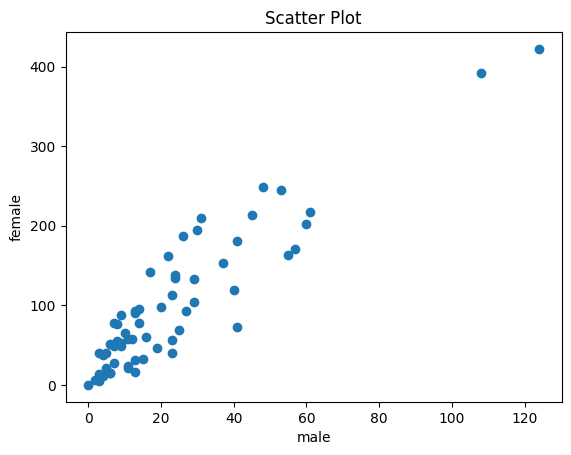

In [12]:
x_column = 'male'  # x축에 사용할 열의 이름
y_column = 'female'  # y축에 사용할 열의 이름
# 산점도 그리기
plt.scatter(Swedish_Auto_Insurance[x_column], Swedish_Auto_Insurance[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot')
plt.show()

In [13]:
inputs = Swedish_Auto_Insurance[['male']].astype(float)
targets = Swedish_Auto_Insurance[['female']]

In [14]:
# training set, test set 나누기
from sklearn.model_selection import train_test_split
(inputs_train,inputs_test,targets_train, targets_test) = train_test_split(inputs,targets,test_size=0.2)

In [15]:
inputs_train

,male
2,13.0
9,10.0
51,13.0
47,27.0
22,9.0
13,23.0
56,30.0
54,8.0
30,0.0
26,4.0


## 학습

#### 초기모델
- 3층 신경망
- 1 -> 10 -> 20 -> 1
- 활성화 함수 : 시그모이드(sigmoid)
- 손실 함수 : MSE
- 최적화 알고리즘 : SGD
- 학습률 : 0.05
- 학습횟수 : 100
- 배치 사이즈 : 25

In [16]:
# 모델
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([1, 10]))
        self.b1 = tf.Variable(initializer([10]))
        self.w2 = tf.Variable(initializer([10,20]))
        self.b2 = tf.Variable(initializer([20]))
        self.w3 = tf.Variable(initializer([20,1]))
        self.b3 = tf.Variable(initializer([1]))

    def call(self,inputs): 
        y1 = self.b1 + inputs @ self.w1
        y1 = tf.keras.activations.sigmoid(y1)
        y2 = self.b2 + y1 @ self.w2
        y2 = tf.keras.activations.sigmoid(y2)
        y3 = self.b3 + y2 @ self.w3
        y3 = tf.keras.activations.sigmoid(y3)
        return tf.squeeze(y3)

    def loss(target,y):
        return ((target-y)**2)

In [17]:
# 손실 함수
def loss(target,y):
  return ((target-y)**2)

In [18]:
lr = 0.05 # 학습률
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = Model()
model.compile(optimizer=opt,loss = loss)
history = model.fit(inputs_train, targets_train, epochs=100, batch_size=25)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 15791.6025
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 15757.2373
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 15757.2363
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 15757.2373
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 15757.2373
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 15757.2363
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 15757.2373
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 15757.2373
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 15757.2373
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 15757.2373
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 15757.2373
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 15757.2363
Epoch 13/10

<Axes: >

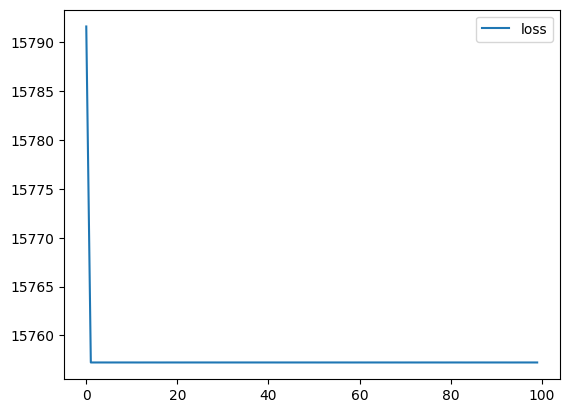

In [19]:
pd.DataFrame(history.history).plot()